In [90]:
import pandas as pd
import sklearn
import datetime
import dateparser
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 


In [91]:
!pip install featurewiz
from featurewiz import featurewiz
np.random.seed(1234)

In [92]:
data = pd.read_csv('airline.csv',sep=',')
data.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


In [93]:
print(data.columns)

Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended'],
      dtype='object')


In [94]:
print('There is')
print(len(data['airline_name'].unique().tolist()))
print('Airline')

There is
362
Airline


In [95]:
len(data[data['airline_name']=='adria-airways'])

52

In [96]:
len(data)

41396

In [97]:
data.shape

(41396, 20)

In [98]:
data['content'].unique().tolist()

["Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.",
 'Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.',
 'Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!',
 "Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with

In [99]:
from sklearn.model_selection import train_test_split
reviews = data['content'].values
labels = data['recommended'].values
reviews_train, reviews_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=1000)

In [100]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)
def spacy_tokenizer(utterance):
      tokens = parser(utterance)
      return [token.lemma_.lower().strip() for token in tokens if token.text.lower().strip() not in stopwords and token.text not in punctuations]

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#By default, the vectorizer might be created as follows:
#vectorizer = CountVectorizer()
vectorizer.fit(reviews_train)

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x0000024E90C53318>)

In [102]:
reviews_train

array(['I fly Air Astana very often almost every week nowadays. I find the experience with new 767 ER relaxing though the flights between Astana and Almaty are always full. The ground staff keep improving. Seems new planes brought a fresh spirit on board. 767 Business Class is great and gives privacy to the customers. Looking forward to flying the Dreamliner. Food is much better than before.',
       'Terrible service on SV121 RUH-LHR on 19/8/14. Flight left on time. This was a morning/lunchtime flight. The crew served a breakfast which was pathetic in content and size. They then insisted that all the window blinds be closed - surprising since that this flight was not so early in the day that people would need to sleep. Passengers were treated like children - fed and put to sleep. The explanation appeared to be that the crew wanted to and did completely disappeared for several hours. About 90 minutes before landing there was another so-called food service (an awful sandwich). Passenger

In [103]:
X_train = vectorizer.transform(reviews_train)
X_test = vectorizer.transform(reviews_test)

In [104]:
str(X_train[0][0])

'  (0, 0)\t36'

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [106]:
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.5614734299516908


Conclusion : 

# Latent Dirichlet Allocation : Topic Modeling

In [108]:
import nltk
import random
import re

In [109]:
papers = data
# Load the regular expression library
# Remove punctuation
papers['paper_text_processed'] = papers['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    outbound flight fra/prn a319 2 hours 10 min fl...
1    two short hops zrh-lju and lju-vie very fast o...
2    flew zurich-ljubljana on jp365 newish crj900 f...
3    adria serves this 100 min flight from ljubljan...
4    waw-skj economy no free snacks or drinks on th...
Name: paper_text_processed, dtype: object

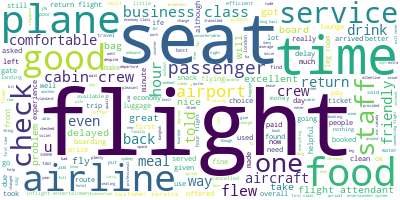

In [110]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [111]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Lenovo Thinkpad
[nltk_data]     L390\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['outbound', 'flight', 'fra', 'prn', 'hours', 'min', 'flight', 'thought', 'drinks', 'snacks', 'sale', 'sandwich', 'soft', 'drinks', 'served', 'complimentary', 'inbound', 'flights', 'skp', 'lju', 'fra', 'crj', 'hour', 'min', 'flight', 'skyshop', 'menu', 'seat', 'pocket', 'drinks']


In [112]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 4), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


In [113]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"good" + 0.013*"seat" + 0.012*"flight" + 0.011*"seats" + '
  '0.010*"cabin" + 0.010*"crew" + 0.009*"service" + 0.008*"class" + '
  '0.008*"food" + 0.006*"time"'),
 (1,
  '0.021*"flight" + 0.015*"service" + 0.011*"food" + 0.010*"seat" + '
  '0.009*"good" + 0.009*"airline" + 0.007*"time" + 0.007*"would" + '
  '0.006*"staff" + 0.005*"return"'),
 (2,
  '0.027*"flight" + 0.012*"service" + 0.009*"staff" + 0.008*"airline" + '
  '0.007*"good" + 0.007*"time" + 0.007*"us" + 0.007*"check" + 0.005*"seats" + '
  '0.005*"food"'),
 (3,
  '0.022*"flight" + 0.010*"seats" + 0.009*"one" + 0.008*"service" + '
  '0.008*"good" + 0.007*"food" + 0.007*"class" + 0.007*"economy" + '
  '0.007*"seat" + 0.007*"crew"'),
 (4,
  '0.037*"flight" + 0.012*"time" + 0.010*"flights" + 0.008*"crew" + '
  '0.008*"service" + 0.007*"would" + 0.007*"food" + 0.007*"seats" + 0.007*"us" '
  '+ 0.007*"hours"'),
 (5,
  '0.031*"flight" + 0.010*"service" + 0.009*"good" + 0.009*"time" + '
  '0.008*"staff" + 0.008*"class" 

In [114]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.013288  0.000307       1        1  19.524744
0      0.032041 -0.004326       2        1  16.942267
5     -0.011090 -0.001347       3        1  11.040553
8     -0.013214 -0.005544       4        1   9.949403
9      0.000249 -0.003045       5        1   9.327417
2     -0.017501 -0.006084       6        1   8.476957
3     -0.000708 -0.006949       7        1   7.856287
1      0.005426 -0.003251       8        1   7.637794
6      0.016975 -0.004542       9        1   5.941567
7      0.001109  0.034781      10        1   3.303011, topic_info=        Term          Freq         Total Category  logprob  loglift
7     flight  64794.000000  64794.000000  Default  30.0000  30.0000
84     class  14201.000000  14201.000000  Default  29.0000  29.0000
88      food  20160.000000  20160.000000  Default  28.0000  28.0000
28      seat  18605.000000  18605.000000  Default  27.0000  27.0000
48     seats  20273.000000  20273.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
231    plane    313.497694  12840.711794  Topic10  -5.5855  -0.3022
13      hour    273.413352   8286.194004  Topic10  -5.7223  -0.0010
351   return    278.464464  12436.184318  Topic10  -5.7040  -0.3887
162    would    275.648717  13697.982516  Topic10  -5.7141  -0.4955
0    airport    257.592496   9502.019052  Topic10  -5.7819  -0.1975

[880 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
24947     10  0.387992  aalesund
20310      9  0.765408      abba
5885       2  0.229755  acapulco
5885       6  0.114878  acapulco
5885       9  0.574389  acapulco
...      ...       ...       ...
53         7  0.043560       zrh
53         8  0.045540       zrh
53         9  0.011880       zrh
53        10  0.136621       zrh
9788      10  0.411406      zytl

[2798 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 6, 9, 10, 3, 4, 2, 7, 8])

# Unsupervised model

In [115]:
from nltk.sentiment import SentimentIntensityAnalyzer
from statistics import mean
first = pd.read_csv('airline.csv',sep=',')
first.head()
sia = SentimentIntensityAnalyzer()
df = pd.DataFrame(columns=['Review','Pos'])
stopwordsw = list(STOP_WORDS)
datas = list(sent_to_words(data))
lenss = []
for idx in range(0,len(data)):
    scores = []
    lenss.append(len(datas[idx]))
    for el in datas[idx]:
        if len(datas[idx])<60:
            if el not in stop_words and el not in stopwordsw:
                polarity = sia.polarity_scores(el)["compound"]
                scores.append(polarity)
    try:
        polarity = mean(scores)
        print(polarity)
        if polarity > 0 :
            print('Positive')
            df = df.append({"Review":datas[idx],"Pos":"1"},ignore_index=True)
        elif polarity < 0 :
            print('Negative')
            df = df.append({"Review":datas[idx],"Pos":"0"},ignore_index=True)
        else:
            df = df.append({"Review":datas[idx],"Pos":"0"},ignore_index=True)
            print('Neutral')
    except:
        print('No value')
        df = df.append({"Pos":"-"},ignore_index=True)

No value
0.09263529411764707
Positive
0.10099629629629629
Positive
No value
No value
No value
No value
0.1282409090909091
Positive
No value
0.08459166666666666
Positive
0.16760666666666665
Positive
No value
No value
0.006222222222222222
Positive
No value
No value
0.07633076923076923
Positive
No value
No value
0.021374074074074073
Positive
No value
No value
0.070308
Positive
No value
0.050914814814814816
Positive
No value
No value
No value
No value
0.06746785714285715
Positive
No value
No value
No value
No value
No value
0.07701111111111111
Positive
No value
No value
0.05691666666666667
Positive
No value
0.122265
Positive
No value
No value
No value
0.06168
Positive
0.04459642857142857
Positive
0.08967142857142858
Positive
No value
No value
0.050330769230769234
Positive
No value
0.03666923076923077
Positive
No value
0.020579166666666666
Positive
0.11774782608695653
Positive
No value
No value
No value
No value
No value
0.06276956521739131
Positive
0.15189473684210528
Positive
0.0753045454

No value
No value
No value
0.03468787878787879
Positive
No value
No value
0.035832
Positive
No value
No value
-0.025836363636363636
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0953
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.10292222222222222
Positive
No value
0.10472272727272727
Positive
No value
0.03636923076923077
Positive
-0.01633125
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.09164666666666667
Positive
No value
No value
No value
0.0709875
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.09228076923076924
Positive
No value
0.11146153846153846
Positive
No value
-0.039536842105263155
Negative
No value
No value
No value
No value
No value
No value
0.08557222222222222
Positive
No value
-0.07586086

0.12062380952380952
Positive
No value
No value
No value
No value
0.0436735294117647
Positive
No value
0.09169130434782609
Positive
No value
0.09020833333333333
Positive
No value
No value
No value
-0.045452941176470585
Negative
No value
No value
No value
No value
No value
No value
0.05807096774193548
Positive
0.10884545454545455
Positive
0.05451333333333334
Positive
0.139725
Positive
No value
No value
No value
No value
No value
No value
0.014627586206896552
Positive
0.06276
Positive
No value
No value
0.13000714285714285
Positive
No value
No value
No value
No value
No value
-0.11320909090909091
Negative
0.07660454545454545
Positive
0.009870967741935487
Positive
-0.04477307692307692
Negative
No value
No value
No value
No value
No value
No value
No value
0.089871875
Positive
0.11247777777777777
Positive
No value
0.02312258064516129
Positive
0.06684782608695652
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.114625
Positive
No value
No value
No va

No value
No value
No value
No value
No value
0.05075769230769231
Positive
No value
-0.029338095238095236
Negative
0.1425722222222222
Positive
No value
No value
0.08088214285714286
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.052125000000000005
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.0465
Negative
No value
No value
No value
No value
No value
No value
No value
No value
0.0763
Positive
0.02936
Positive
0.10206315789473684
Positive
No value
No value
No value
0.05595897435897436
Positive
No value
No value
No value
No value
No value
No value
No value
0.025905882352941178
Positive
No value
No value
0.0258
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.02545333333333333
Negative
No value
No value
No value
No value
No value
No 

No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.06357727272727273
Positive
0.011384615384615384
Positive
No value
0.0317
Positive
0.08466086956521739
Positive
No value
No value
0.025373076923076925
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.07696875
Negative
No value
0.07013225806451613
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.030236363636363634
Negative
No value
No value
No value
No value
0.037283333333333335
Positive
No value
No value
No value
-0.00608148148148148
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.026779166666666663
Positive
No value
No value
No

No value
No value
No value
No value
-0.07456071428571429
Negative
No value
No value
No value
No value
No value
0.12780769230769232
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.018307692307692306
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.06261666666666667
Positive
No value
0.017116
Positive
No value
No value
0.10250833333333334
Positive
No value
No value
No value
0.005938461538461539
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.013394444444444443
Positive
No value
No value
-0.07150714285714285
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.006055172413793101
Positive
No value
No value
No value
No value
No value
No value
-0.023178947368421052


No value
0.0
Neutral
0.10192307692307692
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.1462896551724138
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.07474347826086956
Positive
-0.0010050000000000003
Negative
No value
No value
No value
No value
No value
0.0401
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.10076
Positive
No value
No value
No value
No value
0.08681785714285714
Positive
No value
No value
No value
No value
No value
No value
0.05238
Positive
No value
No value
No value
No value
0.03518076923076923
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.080725
Positive
No value
No value
No value
No value
No value
No value
No value
0.12014615384615385
Positive
No value
No value
-0.04416111111111111
Negative
No value
No value
N

0.01674583333333333
Positive
0.09094615384615384
Positive
No value
No value
No value
No value
0.07456
Positive
-0.049878125
Negative
No value
No value
No value
No value
0.056370833333333335
Positive
No value
0.04850769230769231
Positive
No value
No value
No value
0.07981250000000001
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.03390370370370371
Positive
0.014682608695652175
Positive
0.04905625
Positive
No value
0.03452307692307692
Positive
No value
No value
No value
No value
-0.0012807692307692307
Negative
0.0260375
Positive
No value
No value
No value
0.074252
Positive
No value
No value
No value
No value
0.02978
Positive
No value
No value
No value
No value
-0.057100000000000005
Negative
0.008953125000000001
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.08030526315789474
Positive
No value
No value
No value
-0.023848275862068967
Negative
No value
No value
No value
No va

No value
0.03426333333333333
Positive
No value
No value
No value
No value
No value
-0.002193103448275862
Negative
No value
0.10192307692307692
Positive
No value
No value
0.053014285714285715
Positive
No value
0.09198095238095239
Positive
No value
No value
0.07393333333333334
Positive
No value
No value
No value
0.03752727272727272
Positive
No value
No value
No value
-0.02218421052631579
Negative
No value
-0.0052499999999999995
Negative
-0.07051666666666667
Negative
-0.018057142857142855
Negative
No value
0.0134
Positive
0.02110625
Positive
No value
No value
No value
No value
No value
No value
No value
0.00217037037037037
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.08150454545454545
Positive
No value
No value
No value
0.06481904761904761
Positive
No value
0.006151724137931036
Positive
0.15045
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0964

No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.013157894736842105
Negative
No value
0.10045000000000001
Positive
0.039917857142857144
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.07283
Positive
No value
No value
No value
No value
No value
No value
0.0732578947368421
Positive
No value
No value
No value
No value
No value
No value
0.03301818181818182
Positive
No value
No value
No value
No value
-0.030434375
Negative
No value
No value
No value
0.04695862068965517
Positive
No value
0.08545757575757576
Positive
No value
No value
0.111212
Positive
No value
0.03365555555555556
Positive
No value
No value
0.002308571428571428
Positive
No value
-0.016012
Negative
No value
0.06821071428571429
Positive
No value
No value
No value
No value
No value
No value
No value
0.10372592592592593
Positive
0.03449
Positive
No value


No value
No value
No value
No value
No value
No value
No value
0.13414166666666666
Positive
No value
0.07966521739130435
Positive
No value
No value
No value
No value
0.0041800000000000006
Positive
0.02584545454545455
Positive
0.10738333333333333
Positive
No value
No value
No value
No value
No value
No value
0.069
Positive
No value
No value
No value
0.05336
Positive
No value
No value
-0.0320875
Negative
No value
0.08321200000000001
Positive
No value
No value
No value
-0.026086363636363633
Negative
-0.05450370370370371
Negative
No value
0.06282352941176471
Positive
No value
No value
0.1374388888888889
Positive
No value
0.06026551724137932
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.025174193548387097
Positive
No value
No value
0.10448695652173913
Positive
No value
0.033876923076923075
Positive
-0.038635
Negative
0.03792058823529412
Positive
No value
0.02723333333333333
Positive
-0.06701666666666667
Negati

No value
-0.006846666666666667
Negative
0.03154
Positive
No value
No value
No value
No value
No value
No value
No value
-0.02611153846153846
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.0172
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.023974074074074075
Negative
No value
No value
No value
No value
No value
0.05507741935483871
Positive
No value
No value
No value
No value
No value
0.05874166666666667
Positive
0.07549642857142858
Positive
0.043397058823529414
Positive
No value
No value
No value
No value
No value
0.01835
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.06484615384615385
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0609
Positive
No value
No value
No value
No value
No value
No value
-0.00870384615384615

No value
No value
No value
No value
No value
No value
No value
0.046969565217391304
Positive
No value
No value
0.07964193548387097
Positive
No value
No value
No value
No value
0.07661363636363637
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.079472
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.05230344827586207
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.10911111111111112
Positive
No value
No value
No value
No value
0.04236818181818182
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.007261111111111111
Positive
0.021616666666666666
Positive
0.09434285714285714
Positive
No value
No value
No value
No value
No value
0.08505428571428571
Positive
No va

No value
No value
No value
No value
No value
0.033289285714285716
Positive
No value
No value
0.07138965517241379
Positive
No value
0.06020416666666667
Positive
0.12608823529411764
Positive
No value
No value
No value
0.012915384615384615
Positive
0.08451034482758621
Positive
No value
No value
No value
No value
0.20846666666666666
Positive
No value
No value
No value
0.09922500000000001
Positive
No value
No value
No value
No value
No value
No value
-0.034195652173913044
Negative
-0.034195652173913044
Negative
0.05719
Positive
0.11785
Positive
0.08733703703703705
Positive
0.1144875
Positive
No value
0.06392380952380952
Positive
0.061416
Positive
No value
No value
0.07859642857142857
Positive
No value
0.034716666666666667
Positive
0.08338620689655173
Positive
0.0844952380952381
Positive
0.09418095238095238
Positive
No value
No value
0.029162068965517245
Positive
No value
No value
No value
No value
No value
0.07319666666666667
Positive
No value
No value
No value
No value
No value
No value
No

No value
No value
No value
No value
No value
No value
0.06698823529411765
Positive
No value
0.05278571428571429
Positive
No value
No value
No value
0.07445
Positive
No value
0.03313076923076923
Positive
No value
No value
No value
No value
No value
No value
0.04079583333333334
Positive
0.10288333333333334
Positive
No value
No value
0.089225
Positive
No value
0.08811034482758621
Positive
No value
No value
No value
0.12932631578947368
Positive
0.08936153846153846
Positive
0.07185666666666667
Positive
0.024476190476190478
Positive
0.039599999999999996
Positive
No value
0.20000833333333334
Positive
No value
No value
No value
No value
0.056682352941176475
Positive
No value
-0.04023214285714286
Negative
No value
0.030815625000000003
Positive
0.10288
Positive
0.059090322580645165
Positive
0.04265714285714286
Positive
No value
No value
0.12993043478260868
Positive
No value
No value
No value
No value
0.11351052631578948
Positive
0.09157391304347826
Positive
0.006350000000000001
Positive
No value

No value
No value
No value
No value
No value
0.08033793103448277
Positive
No value
No value
No value
0.09718695652173913
Positive
No value
No value
No value
0.04783333333333334
Positive
No value
No value
0.08397096774193548
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.07465
Positive
0.0721304347826087
Positive
0.04712857142857143
Positive
No value
No value
No value
0.115425
Positive
No value
No value
-0.007308695652173915
Negative
-0.04225217391304348
Negative
No value
No value
No value
No value
0.06496666666666667
Positive
No value
No value
No value
No value
No value
-0.026990909090909093
Negative
-0.020921052631578948
Negative
0.011713333333333334
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.003791666666666665
Negative
No value
No value
No value
No value
No value
0.06739473684210527
Positive
No value
0.03963333333333333
Positive
0.090717

No value
No value
-0.03412222222222222
Negative
No value
0.11431333333333334
Positive
No value
0.10228235294117646
Positive
No value
No value
0.033405
Positive
0.01943870967741936
Positive
No value
No value
-0.086775
Negative
No value
No value
No value
No value
0.047328125
Positive
No value
No value
No value
No value
No value
No value
0.087948
Positive
No value
No value
No value
No value
No value
No value
0.101985
Positive
No value
0.005976000000000001
Positive
No value
0.07998095238095239
Positive
No value
No value
No value
No value
0.12711333333333333
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.02166818181818182
Negative
No value
No value
No value
No value
No value
No value
No value
No value
-0.0032434782608695657
Negative
No value
No value
No value
No value
No value
No value
No value
No value
0.041196666666666666
Positive
No value
No value
0.07314333333333334
Posi

No value
-0.004481818181818183
Negative
No value
No value
No value
No value
No value
No value
No value
No value
0.043880645161290324
Positive
No value
No value
No value
No value
No value
No value
0.03602857142857143
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.08747692307692308
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.11063200000000001
Positive
No value
No value
No value
No value
No value
0.07114137931034482
Positive
No value
No value
No value
No value
No value
0.11175454545454545
Positive
No value
0.012813636363636362
Positive
No value
0.0950483870967742
Positive
0.04068947368421053
Positive
No value
No value
No value
No value
No value
No value
No value
0.031626666666666664
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.04056129032258064
Positive
No value
No value
No value
No value
No value
No value


No value
No value
No value
0.044635714285714286
Positive
0.03372
Positive
0.0586625
Positive
No value
No value
-0.007784375
Negative
No value
0.13391
Positive
0.05335416666666667
Positive
No value
0.0597695652173913
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.046696153846153846
Positive
0.041320833333333334
Positive
No value
No value
No value
No value
No value
0.07628333333333333
Positive
No value
0.10324166666666666
Positive
No value
No value
0.042245454545454544
Positive
No value
No value
No value
0.015794444444444448
Positive
No value
0.03145714285714286
Positive
No value
No value
No value
No value
-0.022327777777777776
Negative
No value
No value
No value
No value
No value
No value
No value
0.02118148148148148
Positive
-0.006153333333333333
Negative
0.045915789473684215
Positive
No value
-0.06320645161290323
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.007086206896551724
Negative

0.08665
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.012233333333333334
Positive
-0.023799999999999998
Negative
0.02994
Positive
0.050252
Positive
0.04824166666666666
Positive
0.10190625
Positive
No value
No value
0.09722
Positive
No value
No value
No value
No value
0.1459375
Positive
-0.016558823529411765
Negative
No value
No value
No value
No value
No value
No value
No value
0.1047388888888889
Positive
No value
No value
No value
No value
No value
No value
No value
0.07272222222222223
Positive
No value
No value
No value
0.016729629629629632
Positive
0.013566666666666668
Positive
No value
No value
-0.0015888888888888886
Negative
-0.04102413793103448
Negative
No value
0.06693
Positive
No value
No value
No value
No value
0.1144875
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.12143333333333334
Positive
No value
0.08180000000000001
Pos

No value
No value
No value
No value
No value
No value
0.03699655172413793
Positive
No value
No value
No value
0.04750740740740741
Positive
0.012040000000000002
Positive
No value
No value
No value
No value
No value
No value
0.11489411764705883
Positive
No value
No value
No value
-0.0502375
Negative
0.08895
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.06921481481481481
Positive
No value
No value
No value
No value
No value
No value
0.064865
Positive
No value
No value
No value
-0.012041176470588236
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.07007000000000001
Positive
0.06991785714285714
Positive
0.020466666666666664
Positive
0.0475375
Positive
No value
No value
No value
No value
0.06156428571428572
Positive
0.0752
Positive
No value
No value
0.03

No value
0.038872222222222225
Positive
0.057848387096774194
Positive
No value
-0.01953529411764706
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0959
Positive
No value
No value
0.1274925925925926
Positive
0.12643157894736842
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.053116000000000003
Negative
No value
No value
-0.011315
Negative
No value
0.0
Neutral
0.04555
Positive
No value
No value
No value
No value
0.0681
Positive
No value
0.030675757575757575
Positive
No value
No value
No value
No value
0.058133333333333335
Positive
0.06454444444444445
Positive
No value
0.022513333333333337
Positive
No value
0.0068000000000000005
Positive
No value
No value
No value
0.055209523809523806
Positive
No value
No value
No value
No value
No value
No value
No value
No v

No value
0.056908
Positive
0.020251851851851854
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.007308333333333332
Positive
No value
No value
No value
No value
No value
No value
No value
No value
-0.01997241379310345
Negative
No value
No value
No value
0.019756
Positive
No value
No value
No value
0.06661666666666667
Positive
No value
No value
No value
No value
0.01727916666666667
Positive
No value
No value
No value
No value
0.08007272727272728
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.0002880000000000005
Negative
No value
No value
No value
No value
No value
No value
-0.013560714285714285
Negative
No value
No value
-0.0362
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.03383103448275862
Negative
No value
No value
No

No value
-0.047628125
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.12224074074074075
Positive
0.10936333333333334
Positive
No value
No value
No value
No value
No value
No value
0.11232857142857143
Positive
No value
No value
No value
No value
-0.09659999999999999
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.05703333333333333
Positive
No value
-0.0016727272727272736
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.042114285714285715
Positive
No value
No value
No value
No value
0.054900000000000004
Positive
No value
0.005394117647058823
Positive
No value
No value
0.06668571428571428
Positive
0.05704827586206897
Positive
0.06487142857142857
Positive
0.035817857142857144
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.09513809523809524
Positive
No value
No val

No value
No value
0.10985625
Positive
No value
0.027957894736842105
Positive
No value
No value
No value
No value
No value
No value
No value
0.15685909090909092
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.06910370370370371
Positive
No value
0.09417777777777778
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.13153
Positive
No value
No value
0.0017500000000000016
Positive
-0.10050434782608696
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.060665217391304344
Positive
No value
No value
No value
No value
0.04562
Positive
No value
No value
0.0800409090909091
Positive
0.15371333333333334
Positive
0.07474761904761905
Positive
0.061427999999999996
Positive
No value
No value
No value
No value
N

No value
No value
No value
No value
-0.04462258064516129
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.01826818181818182
Positive
0.0
Neutral
No value
No value
No value
-0.0319
Negative
No value
No value
-0.0028359999999999995
Negative
No value
No value
0.11522916666666667
Positive
No value
No value
0.052885714285714286
Positive
No value
0.05872
Positive
No value
0.06550277777777778
Positive
No value
No value
No value
No value
0.13117857142857142
Positive
0.09591612903225806
Positive
0.12796000000000002
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.039206451612903225
Positive
No value
No value
No value
0.07270857142857143
Positive
No value
No value
No value
0.08774
Positive
No value
No value
No value
No value
No value
No value
No value
0.08008636363636364
Positive
No valu

No value
0.10182962962962963
Positive
No value
No value
0.046496666666666665
Positive
No value
No value
No value
No value
No value
-0.006711111111111112
Negative
No value
No value
No value
No value
No value
No value
0.04788333333333333
Positive
-0.06487428571428572
Negative
No value
0.06013888888888889
Positive
No value
No value
No value
No value
No value
0.03573823529411765
Positive
No value
No value
0.046733333333333335
Positive
No value
No value
0.024930769230769232
Positive
0.0517
Positive
No value
No value
-0.0832421052631579
Negative
No value
No value
No value
0.013396666666666666
Positive
No value
No value
No value
0.05103214285714285
Positive
No value
No value
0.009534375000000001
Positive
No value
No value
-0.03246
Negative
No value
0.004351612903225807
Positive
No value
No value
-0.05546875
Negative
0.07047142857142857
Positive
No value
No value
0.041749999999999995
Positive
No value
0.07967142857142857
Positive
No value
-0.045375
Negative
0.04685217391304348
Positive
0.08295

No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.040930434782608695
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.13208947368421053
Positive
0.06101142857142857
Positive
No value
No value
No value
-0.012126315789473685
Negative
No value
No value
No value
No value
0.06655357142857143
Positive
No value
No value
No value
0.051608333333333346
Positive
0.021842857142857143
Positive
No value
No value
No value
0.057008823529411765
Positive
No value
-0.06004285714285714
Negative
No value
0.002595454545454547
Positive
-0.027012121212121213
Negative
No value
No value
No value
No value
-0.0019250000000000018
Negative
No value
No value
0.04462631578947368
Positive
-0.03493529411764706
Negative
-0.012742307692307693
Negative
0.047432
Positive
No value
0.0499
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.03672
Positive
No value
No value
No value
No 

0.06556000000000001
Positive
No value
No value
0.09363571428571428
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.18825882352941176
Positive
No value
No value
No value
0.04925142857142857
Positive
No value
-0.028627272727272727
Negative
No value
No value
0.12427
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.020450000000000003
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.0037590909090909107
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.10773333333333333
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.05598214285714286
Positive
No value
No value
0.13434374999999998
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No

No value
0.030023333333333336
Positive
No value
0.052525
Positive
No value
-0.06340625
Negative
No value
No value
No value
No value
No value
No value
No value
No value
0.018153846153846156
Positive
No value
No value
No value
No value
No value
0.15553
Positive
No value
No value
No value
No value
No value
No value
No value
0.002992592592592594
Positive
No value
No value
No value
-0.011315
Negative
0.008122857142857145
Positive
0.06608461538461538
Positive
No value
0.049718181818181814
Positive
No value
0.11283181818181819
Positive
0.043095
Positive
No value
No value
No value
No value
0.049448387096774196
Positive
No value
No value
No value
No value
No value
No value
0.0
Neutral
0.06396785714285715
Positive
No value
0.058183783783783784
Positive
No value
No value
No value
0.02001818181818182
Positive
No value
No value
0.06124545454545455
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0634
Positive
No value
No value
No value
No value
0.076414285

No value
No value
No value
No value
No value
No value
0.0367
Positive
0.0005866666666666669
Positive
No value
No value
0.0028419354838709683
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.052680952380952384
Positive
-0.055775
Negative
No value
0.0472
Positive
No value
0.04796206896551724
Positive
0.08296
Positive
No value
No value
No value
No value
-0.04192592592592593
Negative
No value
No value
No value
No value
0.0998037037037037
Positive
No value
0.0361625
Positive
No value
No value
No value
7.142857142857199e-05
Positive
No value
No value
No value
No value
No value
No value
0.02095
Positive
No value
0.002713513513513514
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.016462499999999998
Positive
No value
No value
0.08059736842105264
Positive
No value
No value
No value
No value
No value
No value
No value
0.03221724137931035
P

No value
-0.05091290322580645
Negative
0.08567000000000001
Positive
No value
No value
No value
0.017794285714285717
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.09038666666666667
Positive
0.0982258064516129
Positive
No value
0.102815
Positive
No value
No value
0.022704545454545453
Positive
No value
0.02433793103448276
Positive
No value
-0.048446666666666666
Negative
0.07181176470588235
Positive
No value
No value
No value
No value
0.04166842105263158
Positive
No value
No value
No value
No value
0.043925
Positive
No value
No value
No value
0.0853952380952381
Positive
No value
0.012575
Positive
No value
-0.018056
Negative
-0.09302857142857143
Negative
No value
No value
No value
No value
No value
0.07139310344827586
Positive
No value
No value
-0.035371428571428574
Negative
No value
No value
No value
No value
No value
No value
0.14582857142857142
Positive
No value
No value
No value
No value
-0.004815789473684212
Negat

No value
No value
0.07455625
Positive
No value
No value
No value
0.07869333333333334
Positive
No value
No value
No value
0.0024916666666666685
Positive
No value
No value
No value
No value
No value
No value
0.05746
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.026483333333333334
Positive
0.06538000000000001
Positive
No value
No value
No value
No value
No value
No value
No value
0.12322777777777778
Positive
No value
No value
No value
No value
No value
No value
No value
No value
-0.041330000000000006
Negative
No value
No value
No value
No value
No value
No value
0.07882173913043479
Positive
-0.02478
Negative
No value
0.06419375
Positive
0.07434117647058823
Positive
-0.04304642857142857
Negative
No value
No value
No value
No value
-0.009688888888888891
Negative
No value
No value
0.09182962962962964
Positive
No value
No value
No value
No value
No value
No value
0.061073076923076924
Positive
No value
No value
No value
No value
0

No value
No value
No value
-0.05272564102564103
Negative
No value
0.07198666666666667
Positive
0.02416666666666667
Positive
No value
0.068952
Positive
No value
No value
No value
0.15102608695652173
Positive
No value
0.051750000000000004
Positive
No value
No value
-0.08606190476190477
Negative
No value
No value
No value
No value
0.07276666666666667
Positive
0.05357241379310345
Positive
No value
No value
No value
No value
No value
0.0887344827586207
Positive
No value
No value
No value
No value
No value
No value
No value
0.06548695652173912
Positive
No value
0.09630952380952382
Positive
0.031155172413793106
Positive
0.046425
Positive
No value
No value
No value
No value
-0.0041958333333333335
Negative
0.06303
Positive
0.0922421052631579
Positive
0.14398666666666668
Positive
0.024796666666666668
Positive
0.012033333333333335
Positive
No value
No value
No value
No value
No value
No value
0.07620588235294118
Positive
No value
No value
No value
No value
0.080475
Positive
No value
0.03115517241

No value
No value
-0.018308333333333333
Negative
No value
No value
No value
No value
No value
0.05794375
Positive
No value
0.002541379310344827
Positive
No value
No value
0.0012285714285714285
Positive
No value
No value
No value
No value
No value
No value
0.09030588235294118
Positive
No value
No value
No value
0.012772727272727269
Positive
0.11975454545454545
Positive
No value
No value
No value
No value
No value
No value
No value
No value
-0.06464782608695652
Negative
No value
No value
No value
No value
-0.059139130434782604
Negative
No value
0.04867692307692308
Positive
No value
No value
0.1715625
Positive
No value
0.08556
Positive
No value
No value
-0.006996666666666666
Negative
No value
-0.0207125
Negative
No value
No value
No value
No value
No value
No value
No value
0.019375
Positive
-0.0372375
Negative
No value
-0.018900000000000004
Negative
No value
0.003456521739130434
Positive
No value
No value
No value
No value
No value
-0.05344
Negative
No value
No value
No value
No value
No

No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.13913125
Positive
No value
No value
0.028858823529411763
Positive
No value
No value
No value
No value
0.05824347826086956
Positive
No value
No value
No value
No value
No value
No value
0.05413333333333334
Positive
No value
No value
0.02033793103448276
Positive
-0.061619230769230766
Negative
0.12236428571428572
Positive
No value
0.06472894736842105
Positive
0.005435000000000004
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.02033461538461538
Negative
No value
0.08624117647058824
Positive
0.12425555555555556
Positive
No value
No value
No value
No value
0.04817894736842105
Positive
0.10609375
Positive
0.10868965517241379
Positive
-0.03815833333333333
Negative
No value
No value
No value
No value
No value
0.09936666666666667
Positive
0.18177083333333333
Positive
0.025956756756756755
Positive
No value
No value
0.08360714285714287

No value
No value
No value
No value
No value
No value
0.08619354838709678
Positive
No value
0.05196279069767442
Positive
No value
No value
No value
0.09933125000000001
Positive
No value
No value
No value
0.07275454545454546
Positive
No value
No value
No value
0.125925
Positive
0.04377941176470588
Positive
-0.04686666666666667
Negative
0.00834814814814815
Positive
No value
No value
No value
No value
No value
No value
0.1034
Positive
No value
No value
No value
No value
No value
No value
0.0992
Positive
0.08470454545454546
Positive
No value
No value
No value
No value
No value
No value
No value
0.00424230769230769
Positive
No value
No value
No value
No value
-0.022776923076923077
Negative
0.04303225806451613
Positive
No value
0.08987272727272727
Positive
No value
-0.027339999999999996
Negative
No value
0.025207407407407408
Positive
0.115368
Positive
No value
No value
No value
-0.014534482758620688
Negative
No value
No value
No value
No value
No value
No value
No value
No value
-0.047578787

No value
No value
No value
No value
0.05101111111111111
Positive
0.08684583333333333
Positive
No value
No value
No value
0.089765625
Positive
No value
No value
No value
No value
-0.0028363636363636343
Negative
0.037836666666666664
Positive
No value
0.13402692307692307
Positive
0.039303571428571424
Positive
0.008459999999999999
Positive
0.06308666666666667
Positive
No value
No value
No value
-0.0020931034482758633
Negative
0.018358823529411764
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.011496153846153845
Negative
No value
0.031143333333333335
Positive
0.054415384615384615
Positive
No value
No value
0.02983125
Positive
0.028061904761904764
Positive
0.003409999999999999
Positive
No value
0.05196315789473684
Positive
No value
-0.06466774193548387
Negative
No value
0.0341625
Positive
No value
No value
0.127
Positive
No value
0.05336
Positive
No value
No value
No value
0.014483783783783784
Positive

0.11818611111111112
Positive
No value
No value
No value
0.019708695652173914
Positive
No value
No value
No value
-0.0033966666666666663
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.060604000000000005
Positive
No value
0.13824074074074075
Positive
No value
No value
No value
No value
No value
0.0856448275862069
Positive
No value
No value
0.04231034482758621
Positive
No value
No value
No value
No value
0.14653333333333332
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0778
Positive
0.08340555555555555
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.04160909090909091
Positive
No value
-0.06219411764705882
Negative
No value
No value
0.023840740740740742
Positive
No value
No value
No value
No value
0.09553157894736843
Positive
0.149
Positive
No value
No value
No value
No value
No value
No value
No value
No value
N

No value
0.019402702702702702
Positive
No value
0.028154545454545456
Positive
No value
0.03192666666666667
Positive
0.14579473684210525
Positive
-0.02868333333333333
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.07072692307692308
Positive
No value
No value
0.005911428571428572
Positive
No value
No value
No value
No value
No value
No value
No value
0.0759
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0800409090909091
Positive
No value
No value
No value
0.08693157894736842
Positive
0.055413333333333335
Positive
0.10877857142857143
Positive
0.043035000000000004
Positive
No value
0.043952
Positive
0.0978157894736842
Positive
No value
No value
0.11147037037037037
Positive
No value
0.08256206896551724
Positive
No value
0.029900000000000003
Positive
No value
No value
No value
No value
No value
0.07345294117647058
Positive
No value
0.09266666666666667
Positive
No value
No value
0.10001
Positive

No value
No value
No value
No value
No value
0.02525625
Positive
0.14101363636363637
Positive
No value
No value
0.06906315789473684
Positive
0.046275
Positive
0.08068260869565218
Positive
No value
No value
0.07991481481481481
Positive
0.0356090909090909
Positive
0.06404
Positive
-0.014705882352941176
Negative
No value
No value
No value
No value
No value
0.11145789473684212
Positive
No value
No value
0.05719
Positive
No value
0.065
Positive
No value
0.042590322580645164
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.10725217391304348
Positive
No value
No value
No value
No value
-0.014432142857142857
Negative
0.0010440000000000004
Positive
No value
No value
No value
No value
No value
0.04536315789473684
Positive
No value
No value
0.09149354838709678
Positive
0.0814
Positive
No value
0.02681
Positive
No value
No value
No value
No value
No value
0.0024214285714285744
Positive
No value
No value
No value
No value
No value
No value
No value
No valu

No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.03273636363636364
Positive
0.11358620689655173
Positive
0.06403333333333333
Positive
No value
No value
No value
-0.01893928571428571
Negative
No value
No value
No value
0.014450000000000001
Positive
No value
No value
No value
No value
0.0482047619047619
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.05214615384615385
Positive
0.0893409090909091
Positive
No value
0.028726470588235294
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.07497222222222222
Positive
No value
No value
0.034030000000000005
Positive
No value
No value
No value
No value
0.11243500000000001
Positive
No value
0.09862083333333332
Positive
-0.017860869565217395
Negative
No value
No value
0.0416875
Positive
No value
0.11325
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.105057142857

No value
No value
0.06577777777777778
Positive
No value
No value
No value
No value
No value
0.003688888888888889
Positive
No value
No value
No value
No value
-0.0516875
Negative
No value
No value
No value
No value
No value
0.026963636363636367
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.026154545454545455
Positive
No value
No value
0.07622631578947368
Positive
No value
0.09077083333333333
Positive
No value
No value
No value
0.0
Neutral
0.03745384615384615
Positive
No value
No value
No value
No value
No value
0.00909130434782609
Positive
0.1332
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.08638214285714285
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.13516071428571427
Positive
No value
No value
No value
No value
No value
0.04536315789473684
Positive
No value
No value
No value
No value
0.0008166666666666669
Posit

No value
No value
No value
No value
No value
No value
0.02444230769230769
Positive
No value
-0.019885185185185186
Negative
No value
No value
No value
0.10084666666666667
Positive
No value
No value
0.07486923076923077
Positive
No value
No value
No value
No value
No value
No value
No value
0.11249354838709678
Positive
No value
No value
No value
0.050004761904761906
Positive
0.08415416666666667
Positive
No value
No value
No value
No value
0.0554375
Positive
No value
0.03364117647058823
Positive
0.07321666666666667
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.02547391304347826
Positive
No value
No value
0.007780769230769231
Positive
0.08655862068965517
Positive
No value
No value
No value
No value
No value
-0.049300000000000004
Negative
No value
No value
No value
No value
No value
No value
0.0905875
Positive
No value
No value
No value
No value
No value
0.10391935483870968
Positive
No value
No value
No value
No value
N

No value
No value
No value
No value
No value
0.054940909090909096
Positive
No value
0.12129333333333334
Positive
No value
No value
0.048914285714285716
Positive
No value
0.11537307692307693
Positive
No value
No value
No value
No value
No value
No value
No value
0.0491
Positive
No value
No value
No value
No value
-0.024320689655172412
Negative
0.08667142857142857
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.044593548387096775
Positive
No value
0.16002307692307693
Positive
No value
No value
0.052551724137931036
Positive
No value
No value
No value
0.014687500000000003
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.09776666666666667
Positive
No value
No value
-0.031580645161290326
Negative
No value
0.065444
Positive
No value
No value
No value
0.06156428571428572
Positive
No value
No value
No value
No value
No value
0.13912
Positive
-0.0132
Negati

No value
No value
No value
-0.0031909090909090928
Negative
No value
0.08891
Positive
No value
No value
No value
0.023
Positive
No value
No value
No value
-0.05266086956521739
Negative
0.09701538461538461
Positive
No value
No value
0.028096296296296296
Positive
-0.001577419354838708
Negative
No value
-0.007516666666666662
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.1219
Positive
0.030713636363636363
Positive
No value
No value
0.07378620689655173
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.14539545454545455
Positive
No value
No value
No value
No value
No value
No value
No value
0.08812727272727273
Positive
0.12275263157894738
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.046794444444444444
Positive
No value
No value
No value
0.02201923076923077
Positive
No value
No value
No value
No value
No val

No value
No value
-0.06948571428571429
Negative
No value
0.12905
Positive
0.042603225806451615
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.04618928571428572
Positive
No value
No value
No value
No value
No value
No value
0.01325714285714286
Positive
No value
No value
0.022029032258064515
Positive
No value
0.0731578947368421
Positive
0.058547999999999996
Positive
No value
0.09975
Positive
No value
No value
No value
0.0673551724137931
Positive
No value
No value
No value
0.008360000000000001
Positive
No value
No value
No value
0.049232000000000005
Positive
No value
No value
No value
No value
No value
No value
0.064732
Positive
0.14957647058823528
Positive
0.054071428571428576
Positive
No value
No value
No value
No value
No value
0.051090322580645164
Positive
No value
No value
0.15844444444444444
Positive
No value
No value
No value
0.10045714285714286
Positive
No value
No value
No value
No value
No value
-0.034122727

No value
No value
No value
0.12537619047619047
Positive
No value
No value
No value
0.022942857142857143
Positive
No value
No value
No value
0.04657096774193548
Positive
-0.012572222222222222
Negative
No value
No value
No value
0.10601304347826088
Positive
No value
No value
No value
No value
No value
No value
No value
0.08453846153846153
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.011171428571428572
Negative
No value
No value
No value
0.031690909090909096
Positive
No value
No value
No value
No value
No value
No value
No value
0.07727391304347826
Positive
No value
No value
No value
No value
No value
No value
0.059707142857142854
Positive
0.08797619047619047
Positive
No value
0.11631851851851853
Positive
0.030146666666666662
Positive
0.05358333333333334
Positive
No value
No value
No value
No value
0.03769333

0.017425925925925928
Positive
0.05322857142857144
Positive
No value
No value
No value
No value
No value
No value
0.031134782608695653
Positive
No value
No value
0.09003125000000001
Positive
0.0908423076923077
Positive
No value
0.05916285714285714
Positive
No value
No value
No value
No value
No value
No value
0.08496666666666668
Positive
No value
No value
No value
0.003365517241379313
Positive
No value
No value
No value
No value
No value
0.016536666666666668
Positive
0.039140625
Positive
No value
0.06357096774193548
Positive
No value
No value
No value
No value
No value
0.07645625
Positive
No value
0.010194117647058824
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.061330434782608696
Positive
0.08744166666666667
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.033193548387096775
Negative
No value
No value
No value
0.09618965517241379
Positive
No value
No v

No value
No value
No value
No value
0.07824
Positive
0.08803529411764706
Positive
No value
No value
No value
No value
0.06688125
Positive
0.014290909090909092
Positive
No value
0.06570833333333334
Positive
No value
0.035875000000000004
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.09626315789473684
Positive
0.02732
Positive
No value
No value
No value
No value
No value
No value
0.06993125
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.048023333333333335
Positive
0.1174
Positive
No value
No value
No value
-0.015034374999999999
Negative
No value
No value
No value
No value
0.0734
Positive
0.09717142857142858
Positive
No value
No value
No value
No value
No value
No value
No value
0.10283846153846153
Positive
No value
No value
No value
No value
No value
No value
No value
0.028065217391304347
Positive
No value
No value
No value
-0.0035619047619047635
Negative

No value
No value
No value
0.06773703703703704
Positive
No value
No value
-0.010606666666666665
Negative
No value
No value
0.016956521739130436
Positive
No value
No value
No value
No value
0.05792380952380952
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.10345185185185185
Positive
0.054155
Positive
No value
No value
No value
No value
No value
No value
No value
0.04655151515151515
Positive
No value
No value
No value
0.05094347826086957
Positive
No value
No value
No value
0.01733030303030303
Positive
No value
0.012588461538461541
Positive
No value
No value
No value
0.0013730769230769256
Positive
No value
0.021733333333333334
Positive
No value
No value
No value
No value
-0.06941111111111112
Negative
No value
-0.03700869565217391
Negative
No value
0.18157500000000001
Positive
No value
No value
No value
-0.006511111111111107
Negative
No value
0.07767692307692307
Positive
No value
No value
No value
0.03332962962962963
Positive
No value
No value
No value
N

No value
-0.022830434782608697
Negative
No value
No value
0.11743823529411765
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.04319166666666667
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.088975
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.017256521739130438
Positive
No value
No value
No value
No value
-0.02065384615384615
Negative
-0.0742608695652174
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No 

No value
No value
No value
0.05199090909090909
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.143215
Positive
No value
No value
No value
0.026873684210526317
Positive
0.10368571428571428
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.02671304347826087
Negative
No value
No value
0.0020166666666666666
Positive
-0.06072142857142857
Negative
-0.0001710526315789468
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.006224999999999999
Negative
No value
-0.012214285714285714
Negative
No value
-0.027115
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.042948275862068966
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No

No value
No value
No value
No value
No value
0.064688
Positive
No value
-0.11440800000000001
Negative
No value
No value
No value
No value
No value
No value
No value
No value
0.024210526315789474
Positive
0.036824137931034485
Positive
No value
No value
No value
-0.000696428571428572
Negative
No value
No value
No value
No value
No value
0.04565909090909091
Positive
No value
No value
No value
No value
No value
-0.009363157894736842
Negative
No value
No value
0.15057777777777778
Positive
No value
-0.018858333333333335
Negative
No value
No value
No value
0.08461666666666667
Positive
-0.011383333333333334
Negative
No value
No value
0.0837
Positive
No value
No value
No value
0.1222
Positive
0.074184
Positive
No value
No value
0.03881428571428571
Positive
No value
No value
No value
No value
0.08559285714285715
Positive
No value
No value
No value
No value
No value
0.0021388888888888907
Positive
No value
No value
No value
No value
No value
No value
No value
0.022244827586206894
Positive
No value

No value
No value
0.012142857142857144
Positive
No value
No value
No value
0.1481
Positive
No value
No value
No value
No value
No value
0.061505555555555556
Positive
No value
No value
No value
No value
No value
0.05594545454545455
Positive
No value
No value
0.039524137931034486
Positive
No value
0.10778928571428571
Positive
No value
No value
No value
-0.03987727272727273
Negative
No value
No value
No value
No value
0.10517
Positive
No value
No value
No value
No value
No value
No value
0.04359310344827586
Positive
No value
0.04212333333333333
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.003309375000000002
Positive
0.07689375
Positive
No value
No value
0.01818095238095238
Positive
No value
0.08170370370370371
Positive
No value
0.027525
Positive
No value
No value
No value
-0.010025000000000001
Negative
-0.035562500000000004
Negative
No value
No value
No value
No value
No value
No value
No 

No value
0.0036035714285714304
Positive
No value
0.05107222222222223
Positive
No value
0.118848
Positive
No value
No value
-0.02367391304347826
Negative
-0.021688235294117647
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.11395925925925926
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.02986
Positive
No value
No value
No value
No value
0.02351904761904762
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.09110454545454545
Positive
No value
No value
No value
No value
No value
No value
No value
0.08775
Positive
No value
-0.003876923076923077
Negative
No value
No value
No value
No value
No value
No value
No value
0.03782222222222223
Positive
No value
No value
No value
0.080475
Positive
No value
No value
No value
No value
No value
No value
-0.04

No value
0.0541
Positive
0.02351904761904762
Positive
0.1610125
Positive
No value
No value
No value
0.032945
Positive
0.12102941176470589
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.054125
Positive
No value
0.056644
Positive
No value
No value
No value
No value
0.04038
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.085156
Positive
No value
No value
No value
No value
0.07282
Positive
0.118815
Positive
No value
No value
No value
0.089325
Positive
No value
No value
-0.09545
Negative
0.12037857142857143
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.08650000000000001
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.056372
Positive
No value
0.04805757575757576
Pos

No value
No value
No value
No value
No value
No value
No value
No value
-0.04588125
Negative
No value
No value
0.07371944444444445
Positive
0.05278846153846154
Positive
No value
No value
0.079125
Positive
No value
No value
No value
No value
No value
0.07414736842105263
Positive
No value
No value
0.13854
Positive
No value
No value
No value
No value
0.07032631578947368
Positive
0.046713157894736845
Positive
No value
No value
0.07809565217391304
Positive
0.11900416666666667
Positive
No value
0.09225714285714286
Positive
0.09387333333333334
Positive
No value
No value
No value
-0.005566666666666668
Negative
No value
No value
No value
No value
0.10123333333333333
Positive
No value
-0.04976666666666667
Negative
0.12059285714285714
Positive
No value
0.021104347826086955
Positive
No value
No value
No value
No value
No value
No value
-0.005113043478260866
Negative
No value
-0.00046363636363635987
Negative
No value
No value
No value
0.08455862068965517
Positive
No value
No value
No value
No value

-0.020833333333333332
Negative
No value
No value
No value
No value
No value
No value
-0.020166666666666666
Negative
No value
No value
0.06936190476190476
Positive
No value
No value
No value
No value
-0.020782758620689654
Negative
0.0
Neutral
0.03917727272727273
Positive
No value
No value
No value
No value
No value
No value
-0.05202777777777778
Negative
No value
No value
0.038141666666666664
Positive
No value
No value
No value
No value
No value
No value
0.08920869565217392
Positive
No value
No value
0.034258333333333335
Positive
No value
No value
0.05360555555555556
Positive
No value
No value
No value
No value
No value
0.018567857142857143
Positive
No value
No value
No value
No value
0.06336296296296297
Positive
No value
No value
0.07269354838709678
Positive
No value
No value
No value
No value
0.03061290322580645
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.021539999999999997
Positive
No value
No value
No value
0.06665
Positive
No value
No 

No value
No value
No value
0.050133333333333335
Positive
No value
0.04966774193548387
Positive
No value
No value
0.06295666666666666
Positive
0.04037368421052631
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.10152162162162162
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.022503703703703706
Positive
No value
-0.07902105263157895
Negative
0.036004999999999995
Positive
No value
No value
No value
No value
No value
No value
No value
-0.029188
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.022327777777777776
Positive
No value
No value
No value
0.005803030303030304
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
N

No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.02804736842105263
Positive
No value
No value
No value
No value
0.016470967741935485
Positive
No value
No value
No value
0.019513793103448276
Positive
No value
No value
No value
No value
-0.03803913043478261
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.01184
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.009052
Negative
No value
No value
No value
-0.037592
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.07596363636363637
Negative
No value
No value
No value
0.08916785714285715
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
N

No value
No value
No value
No value
No value
No value
0.16760416666666667
Positive
No value
No value
No value
0.07983684210526316
Positive
No value
No value
No value
No value
No value
No value
No value
-0.03732173913043478
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.028393103448275864
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.10278888888888889
Positive
No value
0.11384166666666666
Positive
No value
No value
No value
No value
No value
No value
0.10099411764705882
Positive
No value
No value
No value
No value
No value
0.09645833333333334
Positive
No value
No value
No value
No value
No value
0.106624
Positive
No value
No value
No value
No value
No value
No value
No value
0.025680645161290327
Positive
0.048003448275862066
Positive
No value
No value
No value
No value
No value
No value
No value
0.15529583333333333
Positive
No value
No value
No value
-0.027115
Negative
No value
No value
N

-0.06408888888888889
Negative
No value
No value
-0.0013954545454545433
Negative
No value
No value
No value
0.03790625
Positive
No value
0.094
Positive
0.08721666666666666
Positive
-0.013823809523809525
Negative
No value
-0.0746375
Negative
No value
No value
No value
No value
No value
-0.0353421052631579
Negative
No value
0.04306666666666667
Positive
No value
No value
No value
No value
No value
No value
No value
No value
0.11905789473684211
Positive
No value
No value
No value
No value
No value
0.0892
Positive
No value
0.05881818181818182
Positive
0.078104
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.09776
Positive
0.10325769230769231
Positive
No value
-0.021625
Negative
No value
No value
No value
0.09349600000000001
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.021156
Positive
No value
No value
No value
No value
-0.

No value
No value
-0.005926086956521738
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.0835125
Positive
0.04535
Positive
-0.02957142857142857
Negative
No value
No value
No value
No value
No value
No value
No value
No value
No value
-0.008929411764705882
Negative
0.03145714285714286
Positive
No value
0.025905882352941178
Positive
0.15274444444444446
Positive
No value
No value
No value
No value
No value
No value
0.06554615384615385
Positive
No value
No value
0.07291481481481482
Positive
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
No value
0.025556521739130436
Positive
0.10098421052631579
Positive
No value
-0.04927307692307692
Negative
No value
No value
No value
0.06355
Positive
No value
No value
No value
0.05488823529411765
Positive
No value
No value
No value
No value
No value
No value
No value
0.06489545454545455
Positive
No value
No value
No value
No v

In [116]:
cmp60 = 0
for el in lenss:
    if int(el)<60:
        cmp60+=1

In [117]:
len(data)

41396

In [118]:
len(first)

41396

In [119]:
len(df[df['Pos']=='-'])

31868

In [120]:
for ix,rw in df.iterrows():
    if df['Pos'][ix] == '-':
        first['recommended'][ix] = '-'
df = df[df['Pos']!='-']
first = first[first['recommended']!='-']

In [121]:
len(df)

9528

In [122]:
len(first)

9528

In [123]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = df['Pos'].astype(int).values.tolist()
y_true = first['recommended'].values.tolist()

In [124]:
len(y_pred)

9528

In [125]:
len(y_true)

9528

In [126]:
accuracy_score(y_true, y_pred)

0.820528967254408

In [127]:
dfc = df.copy()

In [128]:
pd.DataFrame([df.var()], index=['Variance']).T

,Variance


In [129]:
df.describe()

,Review,Pos
count,9528,9528
unique,9502,2
top,"[rating, cabin, flown, economy, value, for, mo...",1
freq,9,7573


              precision    recall  f1-score   support

           0       0.79      0.54      0.64      2833
           1       0.83      0.94      0.88      6695

    accuracy                           0.82      9528
   macro avg       0.81      0.74      0.76      9528
weighted avg       0.82      0.82      0.81      9528

0.820528967254408


<AxesSubplot:>

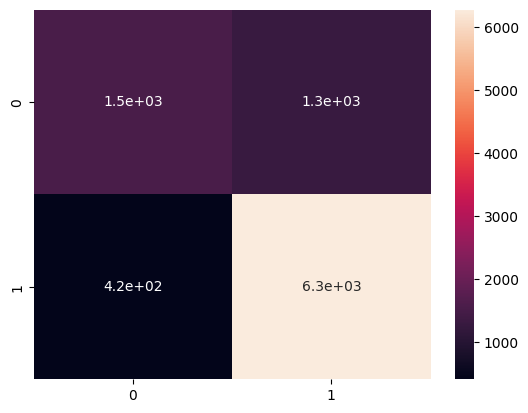

In [130]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))
sns.heatmap(cm, annot=True)

# Machine Learning Processing

In [131]:
data = pd.read_csv('airline.csv',sep=',')
data.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


In [132]:
len(data['aircraft'].unique().tolist())

364

In [133]:
data.columns

Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended'],
      dtype='object')

In [134]:
new_cols = ['cabin_flown','overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating','recommended']

In [135]:
df = data[new_cols]
df['cabin_flown'] = df['cabin_flown'].astype(str)
df = df[df['cabin_flown']!='nan']
print(len(df))

38520


In [136]:
df['ground_service_rating'].unique().tolist()

[nan, 3.0, 4.0, 2.0, 5.0, 1.0]

In [137]:
print(len(df))
#df = df[df['ground_service_rating']!='nan']
#df = df.dropna()
print(len(df))

38520
38520


In [138]:
#X = df.drop(['recommended'],axis=1)
#y = df.recommended.values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [139]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
df.head()

,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,Economy,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,Business Class,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,Economy,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,Business Class,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,Economy,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


In [140]:
X

array([['Economy', 7.0, 4.0, ..., nan, nan, 4.0],
       ['Business Class', 10.0, 4.0, ..., nan, nan, 5.0],
       ['Economy', 9.0, 5.0, ..., nan, nan, 5.0],
       ...,
       ['Economy', nan, nan, ..., nan, nan, 1.0],
       ['Economy', 5.0, nan, ..., nan, nan, 4.0],
       ['Economy', 1.0, nan, ..., nan, nan, 1.0]], dtype=object)

In [141]:
############ OneHot Encoding ###########
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [142]:
print(X[0])

[0.0 1.0 0.0 0.0 7.0 4.0 4.0 4.0 0.0 nan nan 4.0]


In [143]:
########### Missing values ############
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])
##### Standard Scalling ############
X_scaled =  StandardScaler().fit_transform(X)
############ Splitting data ############
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid)

0.9400311526479751

In [144]:
df['recommended']

0        1
1        1
2        1
3        1
4        0
        ..
41391    0
41392    1
41393    0
41394    1
41395    0
Name: recommended, Length: 38520, dtype: int64

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (38520, 10)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
############

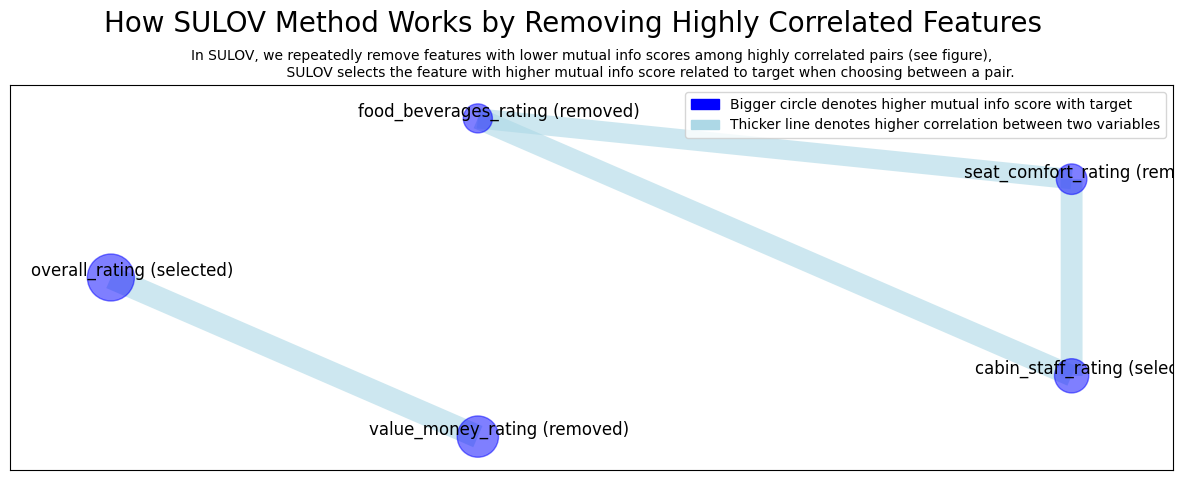

Time taken for SULOV method = 2 seconds
    Adding 1 categorical variables to reduced numeric variables  of 3
Final list of selected 4 vars after SULOV = ['inflight_entertainment_rating', 'overall_rating', 'cabin_staff_rating', 'cabin_flown']
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (38520, 8)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 7 
    Taking top 1 features per iteration...
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 100
        using 7 variables...
            selecting 1 feature

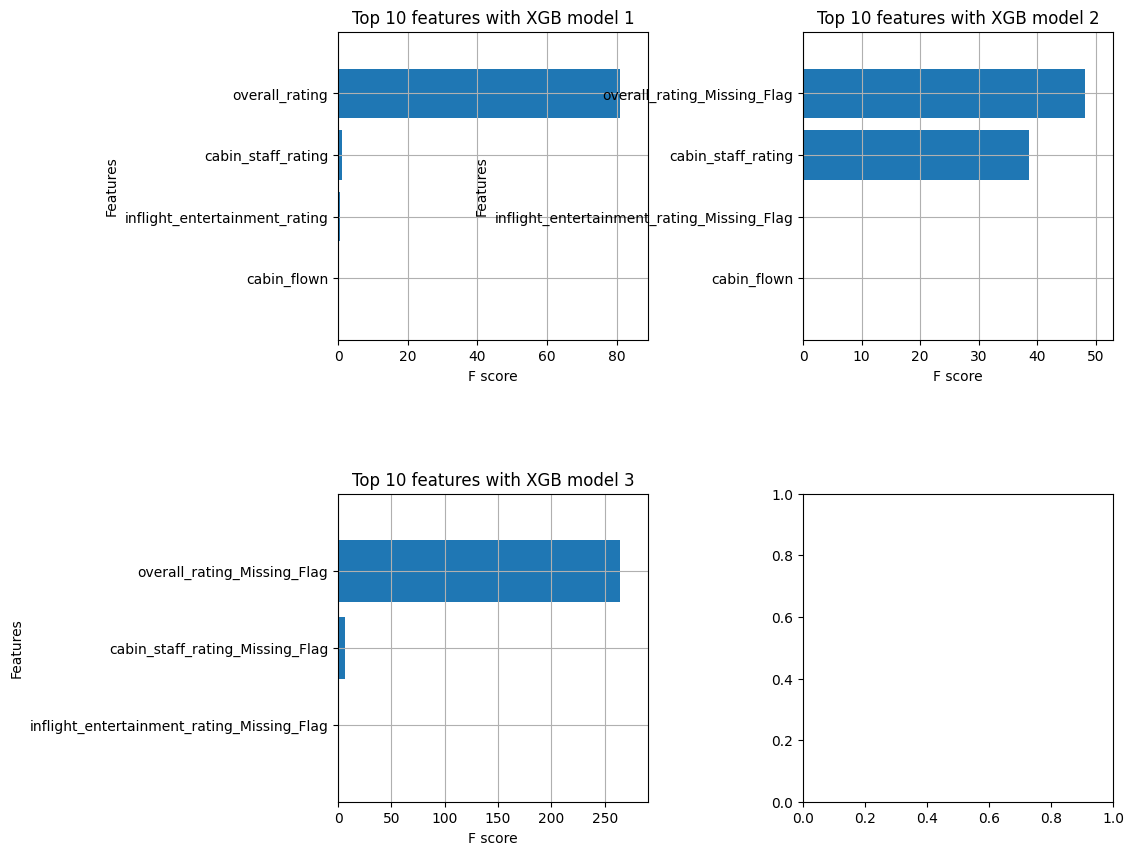

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Alert: Dont forget to add a missing flag to overall_rating to create overall_rating_Missing_Flag column
Selected 2 important features:
['overall_rating', 'overall_rating']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 2 important features and a train dataframe
There are special chars in column names. Please remove them and try again.


In [145]:
# automatic feature selection by using featurewiz package
target = 'recommended'
 
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",header=0,test_data="", feature_engg="", category_encoders="")

In [146]:
target

'recommended'

In [147]:
features

['overall_rating']

In [148]:
dfStart = df.copy()

In [149]:
features.append(target)
dfSelect = df[features]

In [150]:
dfSelect = dfSelect.dropna()

In [151]:
X = dfSelect.iloc[:, :-1].values
y = dfSelect.iloc[:, -1].values

In [152]:
########### Missing values ############
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])
##### Standard Scalling ############
X_scaled =  StandardScaler().fit_transform(X)
############ Splitting data ############
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid)

0.9404676516998995

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2665
           1       0.96      0.95      0.95      4306

    accuracy                           0.94      6971
   macro avg       0.94      0.94      0.94      6971
weighted avg       0.94      0.94      0.94      6971

0.9404676516998995


<AxesSubplot:>

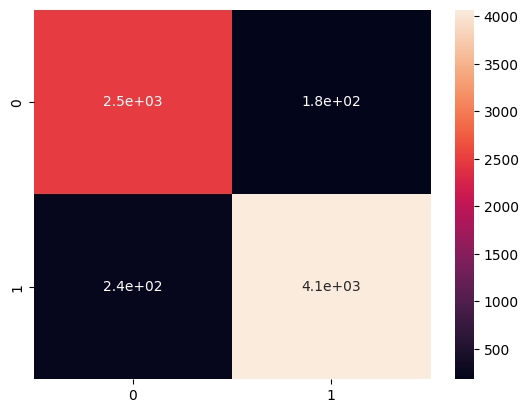

In [153]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_valid, preds)
print(classification_report(y_valid, preds))
print(accuracy_score(y_valid, preds))
sns.heatmap(cm, annot=True)

In [154]:
y_test=y_valid.astype(int)
y_pred=preds.astype(int)
import plotly.express as px
from sklearn.metrics import roc_curve, auc

#y_score = log_reg_classifier.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=y_pred, color=y_test, nbins=50,
    labels=dict(color='True Labels', x='Class')
)

fig_hist.show()
dff = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
dff.index.name = "Thresholds"
dff.columns.name = "Rate"

fig_thresh = px.line(
    dff, title='TPR and FPR at every threshold',
    width=700, height=500
)

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 2], constrain='domain')
fig_thresh.show()

# Hybrid Machine Learning and Natural Language Processing

In [155]:
df = dfc

In [156]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(x))

In [157]:
df

,Review,Pos
1,two short hops zrh lju and lju vie very fast o...,1
2,flew zurich ljubljana on jp newish crj flight ...,1
7,lju to fra and back both flights were on time ...,1
9,flights from lju to zrh and back all on time i...,1
10,was very satisfied with the crj on my flight f...,1
...,...,...
41381,luton warsaw return trip this short hop was ef...,1
41389,treviso to lviv seemed like new plane very com...,1
41390,rome to prague was very happy with the flight ...,1
41391,this airline is terrible timetable changes mov...,0


In [158]:
df['Review']

1        two short hops zrh lju and lju vie very fast o...
2        flew zurich ljubljana on jp newish crj flight ...
7        lju to fra and back both flights were on time ...
9        flights from lju to zrh and back all on time i...
10       was very satisfied with the crj on my flight f...
                               ...                        
41381    luton warsaw return trip this short hop was ef...
41389    treviso to lviv seemed like new plane very com...
41390    rome to prague was very happy with the flight ...
41391    this airline is terrible timetable changes mov...
41393    avoid wizzair group of us had our outgoing fli...
Name: Review, Length: 9528, dtype: object

In [159]:
#first = pd.read_csv('airline.csv',sep=',')
first

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
7,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,M Znidar,Slovenia,2014-05-10,LJU to FRA and back both flights were on time....,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,3.0,NaN,NaN,4.0,1
9,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,M Znidar,Slovenia,2014-01-06,Flights from LJU to ZRH and back all on time. ...,NaN,NaN,Economy,NaN,10.0,5.0,5.0,4.0,4.0,NaN,NaN,4.0,1
10,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Aytek Cingitas,Turkey,2013-10-22,I was very satisfied with the CRJ 900 on my fl...,NaN,NaN,Economy,NaN,9.0,4.0,4.0,4.0,4.0,NaN,NaN,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41381,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,Ray Short,United Kingdom,2010-10-12,Luton-Warsaw return trip. This short hop was e...,NaN,NaN,Economy,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1
41389,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,John Gorick,United Kingdom,2010-07-26,Treviso to Lviv. Seemed like a new plane. Very...,NaN,NaN,Economy,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1
41390,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,E Kremer,United States,2010-07-24,Rome to Prague. Was very happy with the flight...,NaN,NaN,Economy,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1
41391,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,A Bland,United Kingdom,2010-07-15,This airline is terrible! Timetable changes (m...,NaN,NaN,Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [160]:
test_col = ['airline_name',
       'content',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended']

In [161]:
first[test_col].head()

,airline_name,content,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
1,adria-airways,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
7,adria-airways,LJU to FRA and back both flights were on time....,9.0,5.0,5.0,4.0,3.0,NaN,NaN,4.0,1
9,adria-airways,Flights from LJU to ZRH and back all on time. ...,10.0,5.0,5.0,4.0,4.0,NaN,NaN,4.0,1
10,adria-airways,I was very satisfied with the CRJ 900 on my fl...,9.0,4.0,4.0,4.0,4.0,NaN,NaN,4.0,1


In [162]:
df['recommended'] = first['recommended']

In [163]:
df.head()

,Review,Pos,recommended
1,two short hops zrh lju and lju vie very fast o...,1,1
2,flew zurich ljubljana on jp newish crj flight ...,1,1
7,lju to fra and back both flights were on time ...,1,1
9,flights from lju to zrh and back all on time i...,1,1
10,was very satisfied with the crj on my flight f...,1,1


In [164]:
# Cleaning of data: Since these tweets might contain punctuation marks and other non-relevant characters, we will process those and remove them from the model
# Let us also divide the feature and label sets for this data
feature_set = df.iloc[:, 0].values
label_set = df.iloc[:, 2].values
label_set=label_set.astype('int')

In [165]:
feature_set

array(['two short hops zrh lju and lju vie very fast on crj seats comfortable and crew was fine ground services good and lounge was quite nice',
       'flew zurich ljubljana on jp newish crj flight almost full departure on time service on board by pleasant and friendly female flight attendants bought coffee mineral water and very nice and fresh filled croissant for eur good value',
       'lju to fra and back both flights were on time flights were made by crj nextgen aircraft very clean cabin and comfortable seats staff were always nice and friendly new skyshop service was excellent with nice prices and it not too expensive',
       ...,
       'rome to prague was very happy with the flight airplane clean with leather seats the flight attendants were polite baggage claim was quick',
       'this airline is terrible timetable changes moving flights to different days rather than times after you ve booked are unacceptable when people have already made non refundable bookings for ground t

In [166]:
label_set

array([1, 1, 1, ..., 1, 0, 0])

In [167]:
cleaned_feature_set = list()
for input_phrase in range(0, len(feature_set)):
    # 1.Removing all the special characters (*,etc.) and single characters (a,an,etc.)
    clean_feature = re.sub(r'\W', ' ', str(feature_set[input_phrase]))
    clean_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_feature)
    clean_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_feature)
    # 2.Convert the entire phrase to lower cases
    clean_feature = clean_feature.lower()
    cleaned_feature_set.append(clean_feature)

In [168]:
# Changing the text to a numerical form: All machine learning and statistical models use mathematics and numbers to compute data. Since the input here is textual, we will use the TF-IDF scheme to process words.
# Import the necessary packages
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
input_vector = TfidfVectorizer (max_features=3000, min_df=6, max_df=0.8, stop_words=stopwords.words('english'))
cleaned_feature_set = input_vector.fit_transform(cleaned_feature_set).toarray()

In [169]:
# Let us now use the Train, Test, Split function to divide this data into training and testing sets. We will use the training set to train the model and find the best suitable model for this prediction and then run that model on the test data to finalize the prediction score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_feature_set, label_set, test_size=0.33, random_state=42)

In [170]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 0 ... 1 1 1]
[0 0 1 ... 1 1 1]


In [171]:
len(y_train)

6383

In [172]:
# Random Forest Classification,Support Vector Machine Linear Classification, Logistic Regression, K-Nearest Neighbors Classification and  
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier_score = rf_classifier.score(X_train, y_train)

In [173]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Machine Linear Classification
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
svc_classifier_score = svc_classifier.score(X_train, y_train)
# Logistic Regression
lr_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
lr_classifier_score = lr_classifier.score(X_train, y_train)
# K-Nearest Neighbors Classification
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_classifier_score = knn_classifier.score(X_train, y_train)

In [174]:
# Final prediction using the best-case algorithm from the above table
final_pred = rf_classifier.predict(X_test)
# Accuracy score of the final prediction
print(accuracy_score(y_test, final_pred))
final_pred = svc_classifier.predict(X_test)
# Accuracy score of the final prediction
print(accuracy_score(y_test, final_pred))
final_pred = lr_classifier.predict(X_test)
# Accuracy score of the final prediction
print(accuracy_score(y_test, final_pred))
final_pred = knn_classifier.predict(X_test)
# Accuracy score of the final prediction
print(accuracy_score(y_test, final_pred))

0.8715421303656598
0.8753577106518283
0.8820349761526232
0.7777424483306836


              precision    recall  f1-score   support

           0       0.91      0.67      0.77       932
           1       0.87      0.97      0.92      2213

    accuracy                           0.88      3145
   macro avg       0.89      0.82      0.85      3145
weighted avg       0.88      0.88      0.88      3145

0.8820349761526232


<AxesSubplot:>

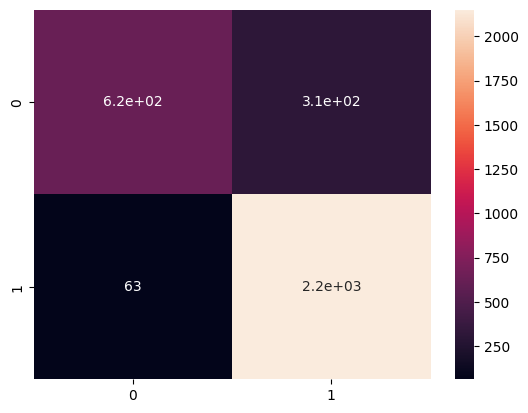

In [176]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, final_pred)
print(classification_report(y_test, final_pred))
print(accuracy_score(y_test, final_pred))
sns.heatmap(cm, annot=True)

In [177]:
y_test=y_test.astype(int)
y_pred=final_pred.astype(int)
import plotly.express as px
from sklearn.metrics import roc_curve, auc

#y_score = log_reg_classifier.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=y_pred, color=y_test, nbins=50,
    labels=dict(color='True Labels', x='Class')
)

fig_hist.show()
dff = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
dff.index.name = "Thresholds"
dff.columns.name = "Rate"

fig_thresh = px.line(
    dff, title='TPR and FPR at every threshold',
    width=700, height=500
)

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 2], constrain='domain')
fig_thresh.show()